<img heigth="8" src="https://i.imgur.com/826AqJI.png" alt="pbs-enae">

<h1 align="left">Ingesta de Datos con Python</h1>

<h2 align="left"><i>Conectandonos a fuentes externas de datos</i></h2>

<p align="left">
  <h3><a href="https://joefaver.dev">Joseph F. Vergel-Becerra</a> | Introducción a Python - Tools and Skill Courses</h3>
  <br>
  <b>Last updated:</b> <i>16/02/2026</i>
  <br><br>
  <a href="#tabla-de-contenido">Tabla de contenido</a> •
  <a href="#referencias">Referencias</a> •
  <a href="#contribuir">Contribuir</a>
  <br><br>
</p>
<table align="left">
  <td>
    <a href="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000">
      <img src="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000" alt="Version" height="18">
    </a>
  </td>
  <td>
    <a href="https://colab.research.google.com/github/joefavergel/pbs-enae-python-beginners-course/blob/main/3-python-data-intake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
    </a>
  </td>
  <td>
    <a href="https://github.com/joefavergel/pbs-enae-python-beginners-course" target="_parent"><img src="https://img.shields.io/github/forks/joefavergel/pbs-enae-python-beginners-course?style=social" alt="Fork"/>
    </a>
  </td>
</table>
<br>
<br>

---

Bienvenid@ al curso interactivo de introducción a `Python`. Ya seas un programador experimentado o no, este curso está destinado a todos los que deseen aprender el lenguaje de programación `Python` desde cero y enfocar su especialización en la ciencia de datos.

<a id='tabla-de-contenido'></a>
## Tabla de contenido
    
<ol>
    <li><a href="#1-preludio"><b>Preludio</b></a></li>
    <li><a href="#2-ingesta-datos"><b>¿En qué consiste la ingesta de datos?</b></a></li>
    <li><a href="#3-carga-manual"><b>Carga manual de datos</b></a></li>
    <ol type="i">
        <li><a href="#i-csv">Desde archivos CSV y Excel</a></li>
        <li><a href="#ii-json">JSON y XML: lectura y parseo</a></li>
        <li><a href="#iii-parquet">Formatos Avanzados: HDF5 y Parquet</a></li>
    </ol>
    <li><a href="#4-conectarse-api"><b>¿Qué es una API web y cómo conectarnos a una?</b></a></li>
    <ol type="i">
        <li><a href="#i-yahoo">Yahoo! Finance's API</a></li>
    </ol>
    <li><a href="#ejercicios"><b>Ejercicios caso practico: "Ingesta de Datos con Python"</b></a></li>
</ol>

<a id="1-preludio"></a>
## 1. Preludio

In [1]:
import sys
from IPython.core.display import HTML

from pathlib import Path
from packaging import version
import sklearn
import urllib.request


print("[INFO] Este proyecto requiere python 3.9 o superior.")
assert sys.version_info >= (3, 9)
print("[INFO] Versiones verificadas exitosamente!")


def css_styling():
    styles_path = Path(f"./styles/custom.css")
    if not styles_path.is_file():
        Path("styles").mkdir(parents=True, exist_ok=True)
        url = f"https://github.com/joefavergel/pbs-enae-python-beginners-course/blob/main/styles/custom.css?raw=true"
        urllib.request.urlretrieve(url, styles_path)

    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)


css_styling()

[INFO] Este proyecto requiere python 3.9 o superior.
[INFO] Versiones verificadas exitosamente!


<a id="2-ingesta-datos"></a>
## 2. ¿En qué consiste la ingesta de datos?

El proceso de importar información desde múltiples fuentes o desde un único sistema de almacenamiento, se conoce como ingesta de datos. Las fuentes de información pueden ser sistemas fisicos locales (*onpremise*) o sistemas informaticos en la nube, como por ejemplo, *data warehouse*, *cloud storage*, APIs (*Application Programming Interface*) o bases de datos. Como los datos tienen diferentes formas y pueden proceder de centenares de fuentes, estos deben ser procesados, limpiados y estructurados, para posteriormente ser transformados y cargados en un formato único. A este procedimiento se le conoce como [Extraer/Transformar/Cargar](https://es.wikipedia.org/wiki/Extract,_transform_and_load) (ETL, por sus siglas en ingles).

Ahora, los mecanismos de ingesta de datos son las herramientas y los procesos que se utilizan para acceder y cargar datos en un sistema o aplicación. Estos mecanismos pueden incluir métodos manuales, como la carga manual de archivos, o métodos automáticos, como las APIs y el *streaming* de datos. La elección del mecanismo adecuado depende del tipo de datos que se desee ingestar, el volumen de datos que se maneje y la complejidad de los sistemas involucrados. En general, los mecanismos de ingesta de datos son esenciales para garantizar que los datos sean precisos, confiables y estén disponibles cuando se necesiten. A continuación, se listan algunos de los mecanismos de ingesta de datos mas utilizados:

- **Carga manual de archivos:** los usuarios pueden cargar archivos en un sistema utilizando una interfaz de usuario para cargar los datos.

- **Extracción de bases de datos:** los datos se extraen directamente de las bases de datos utilizando consultas `SQL` o consultas a bases de datos no relacionales, comopor ejemplo `MongoDB`.

- **API (Application Programming Interface):** los datos se obtienen a través de una API, que proporciona una forma programática de acceder a los datos.

- **Intercambio de archivos:** los archivos se intercambian automáticamente entre sistemas utilizando protocolos de transferencia de archivos, como `FTP` o `SFTP`.

- ***Web scraping:*** los datos se recopilan automáticamente de sitios web utilizando herramientas de web scraping.

- **Streaming de datos:** los datos se transmiten en tiempo real desde dispositivos o sistemas remotos.

- **Integración de sistemas:** los datos se integran entre sistemas utilizando herramientas de integración empresarial como *middleware*.

- **Correo electrónico:** los datos se reciben automáticamente en una dirección de correo electrónico y se procesan automáticamente.

- ***IoT (Internet of Things):*** los dispositivos IoT recopilan y envían datos automáticamente a través de redes inalámbricas.

En esta sesión nos enfocaremos en las APIs, por ser uno de los mecanismos más ampliamente usados en diversos ecosistemas tecnológicos.

<a id="3-carga-manual"></a>
## 3. Carga manual de datos

La "carga manual de datos" se refiere al proceso de **importar datos** desde diferentes fuentes y formatos directamente a un programa o sistema sin el uso de herramientas automatizadas o flujos de trabajo predefinidos. En lugar de depender de conexiones en tiempo real o sistemas de integración automática, en este método, los usuarios seleccionan y cargan archivos o conjuntos de datos específicos de manera intencional. Este proceso es común en análisis de datos, donde los analistas recopilan datos de diversas fuentes, como archivos CSV, Excel, JSON, XML, entre otros, y los cargan en herramientas o lenguajes de programación, como `Python`, para su posterior análisis y procesamiento.

<p align="center">
  <a target="_blank">
    <img width="800px" src="https://i.imgur.com/PT7XoY6.png" alt="python-interpreter">
  </a><br>
  <b>Figura 1:</b> Carga de datos exportados desde Excel a pandas.
</p><br>

Aunque puede ser menos eficiente que los métodos automatizados para grandes volúmenes de datos o aplicaciones en tiempo real, la carga manual ofrece precisión, control y flexibilidad, permitiendo a los usuarios trabajar con datos específicos según sus necesidades.

Pandas es ampliamente utilizada para la carga de datos. Una de las razones de su popularidad es su amplio conjunto de métodos de entrada/salida (Input/Output o I/O) que facilitan la carga y el almacenamiento de datos en una variedad de formatos. Estos métodos permiten a los usuarios leer datos desde diferentes fuentes, como archivos CSV, Excel, bases de datos SQL, y formatos como JSON o Parquet, y cargarlos en estructuras de datos de Pandas, principalmente **DataFrames**. Del mismo modo, los usuarios pueden guardar fácilmente sus **DataFrames** en estos formatos o exportarlos para su uso en otras herramientas o sistemas.

Por ejemplo, con pandas, cargar un archivo CSV o escribir un `DataFrame` en un archivo Excel es tan simple como usar `read_csv()` o `to_excel()`, respectivamente. Estas funciones ofrecen una amplia gama de parámetros que permiten un control detallado sobre cómo se leen o escriben los datos, como especificar delimitadores, manejar fechas o definir tipos de datos.

<p align="center">
 <a target="_blank">
   <img width="600px" src="https://i.imgur.com/gzQTOBD.png" alt="python-interpreter">
 </a><br>
  <b>Figura 2:</b> Metodos Inputo/Output (I/O) de pandas.
</p><br>

En resumen, los métodos I/O simplifican y estandarizan la forma en que los analistas y científicos de datos interactúan con diferentes formatos y fuentes de datos, permitiéndoles centrarse en el análisis y procesamiento de los datos en lugar de en los detalles técnicos de la ingesta y exportación.

<a id="i-csv"></a>
### A. Desde archivos CSV y Excel

El método más común para la ingesta de datos en Python es a través de archivos CSV o Excel, gracias a la biblioteca pandas.

Ahroa descargaremos un dataset de prueba. A continuación, la siguiente celda verifica la existencia del archivo original de datos y si no ha sido descargado, creará el directorio, descargará el archivo y lo descomprimirá. Al contar con los datos, el primer paso es enmarcar el problema al que nos enfrentaremos.

<div class="remark">
<b>Importate:</b> Por el momento no se preocupe por dominio de los datasets, el tipo de informacion o el contexto de la misma. La diea principal es aprender a utilizar <code>pandas</code>.
</div>

In [2]:
from pathlib import Path
from zipfile import ZipFile
import urllib.request

DATASET = "bigquery-geotab-intersection-congestion"
DATA_PATH = f"datasets/{DATASET}/"


def load_traffic_congestion_data(dataset: str):
    zipfile_path = Path(f"datasets/{dataset}.zip")
    if not zipfile_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = f"https://github.com/joefavergel/datasets/blob/main/{dataset}.zip?raw=true"
        urllib.request.urlretrieve(url, zipfile_path)
    Path(f"datasets/{dataset}").mkdir(parents=True, exist_ok=True)
    try:
        ZipFile(zipfile_path).extractall(f"datasets/{dataset}")
        print(f"[INFO] Dataset \'{dataset}\' downloaded and uncompressed correctly!")
    except Exception as e:
        print(f"[Exception] There's been a problem: {e}")


load_traffic_congestion_data(dataset=DATASET)

[INFO] Dataset 'bigquery-geotab-intersection-congestion' downloaded and uncompressed correctly!


Una vez se nos ha tenemos la información, analicemos con qué archivos contamos y de qué tipo. De esta manera intentaremos responder estas preguntas claves.

Utilicemos la biblioteca [`os`](https://docs.python.org/es/3.10/library/os.html) del *core* de `python`, que en términos generales nos permite ejecutar funcionalidades propias del sistema operativo (OS: *Operative System*). Nos interesa visualizar los archivos presentes en directorio y podremos hacerlo desde `jupyter` con tan solo ejecutar la siguiente celda:

In [3]:
import os

print(
    f"[INFO] Los archivos presentes en \"{DATA_PATH}\":"
    f"\n\n{os.listdir(DATA_PATH)}"
)

[INFO] Los archivos presentes en "datasets/bigquery-geotab-intersection-congestion/":

['submission_metric_map', 'BigQuery-Dataset-Access.md', 'test.csv', 'train.csv', 'submission_metric_map.json', 'sample_submission.csv']


En la anterior salida de celda (*output*), vemos que contamos con `'test.csv'` y `'train.csv'`. Estos dos archivos son precisamente los que contienen la información principal.<br><br>

<div class="tip">
    <b>Tip:</b> <i>Los archivos CSV (del inglés comma-separated values) son un tipo de documento en formato abierto sencillo para representar datos en forma de tabla.⁴</i> Muchas de las bases de datos modernas permiten exportar datos en el formato CSV, por lo que es muy usual solicitarlos y/o recibirlos de esta manera.
</div><br>

In [4]:
import os
import pandas as pd

train = pd.read_csv(os.path.join(DATA_PATH, "train.csv"))
train

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856382,2777739,1990,39.938232,-75.149930,South 4th Street,Catharine Street,S,W,17,1,...,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,75.5,Philadelphia
856383,2777740,1990,39.938232,-75.149930,South 4th Street,South 4th Street,S,S,18,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philadelphia
856384,2777741,1990,39.938232,-75.149930,South 4th Street,South 4th Street,S,S,19,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philadelphia
856385,2777742,1990,39.938232,-75.149930,Catharine Street,Catharine Street,W,W,20,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philadelphia


In [5]:
with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train.shape}")
    display(train.head())

[INFO] Training dataset dimnesions (rows, cols): (856387, 28)


,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,TotalTimeStopped_p60,TotalTimeStopped_p80,TimeFromFirstStop_p20,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,6,Marietta Boulevard Northwest_NW_Marietta Boule...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,6,Marietta Boulevard Northwest_SE_Marietta Boule...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,6,Marietta Boulevard Northwest_NW_Marietta Boule...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,6,Marietta Boulevard Northwest_SE_Marietta Boule...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,6,Marietta Boulevard Northwest_NW_Marietta Boule...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta


In [6]:
test = pd.read_csv(os.path.join(DATA_PATH, "test.csv"))
with pd.option_context('display.max_columns', None):
    print(f"[INFO] Testing dataset dimnesions (rows, cols): {test.shape}")
    display(test.head())

[INFO] Testing dataset dimnesions (rows, cols): (1921357, 13)


,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,City
0,0,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,0,0,6,Peachtree Street Southwest_NE_Peachtree Street...,Atlanta
1,1,1,33.75094,-84.393032,Peachtree Street Southwest,Mitchell Street Southwest,SW,SE,0,0,6,Peachtree Street Southwest_SW_Mitchell Street ...,Atlanta
2,2,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,SW,SW,0,0,6,Peachtree Street Southwest_SW_Peachtree Street...,Atlanta
3,3,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,1,0,6,Peachtree Street Southwest_NE_Peachtree Street...,Atlanta
4,4,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,SW,SW,1,0,6,Peachtree Street Southwest_SW_Peachtree Street...,Atlanta


In [7]:
train.head(100).to_csv("datasets/train_sample.csv", index=False)

In [8]:
train.head(100).to_excel("datasets/train_sample.xlsx", index=False)

### Ejercicio rapido: CSV y Excel

Usando el DataFrame `train` ya cargado, muestra las **ultimas 10 filas** con `.tail(10)` y luego imprime la cantidad de filas y columnas usando `.shape`.

In [ ]:
# Tu codigo aqui


<a id="ii-json"></a>
### B. JSON y XML: lectura y parseo

JSON es un formato de texto sencillo para el intercambio de datos. Se trata de un subconjunto de la notación literal de objetos de JavaScript, aunque, debido a su amplia adopción como alternativa a XML, se considera un formato independiente del lenguaje. JSON (acrónimo de JavaScript Object Notation, 'notación de objeto de JavaScript') es un formato de texto sencillo para el intercambio de datos.

<p align="center">
 <a target="_blank">
   <img width="700px" src="https://i.imgur.com/M0NhThY.png" alt="python-interpreter">
 </a><br>
  <b>Figura 2:</b> Ejemplo de datos en formato JSON.
</p><br>

JSON y XML son estructuras de datos comunes para la ingesta de datos, especialmente en aplicaciones web.

In [9]:
from pathlib import Path
import urllib.request

JSON_URL = "https://raw.githubusercontent.com/joefavergel/datasets/main/john_smith.json"
DATA_PATH = Path("datasets/john_smith.json")

if not DATA_PATH.is_file():
    Path("datasets").mkdir(parents=True, exist_ok=True)

try:
    urllib.request.urlretrieve(JSON_URL, DATA_PATH)
    print(f"[INFO] The JSON file was downloaded successfully!")
except Exception as e:
    print(f"[Exception] There's been a problem: {e}")

[INFO] The JSON file was downloaded successfully!


In [10]:
import os

print(
    f"[INFO] Los archivos presentes en \"{DATA_PATH.parent}\":"
    f"\n\n{os.listdir(DATA_PATH.parent)}"
)

[INFO] Los archivos presentes en "datasets":

['splitted-banking-marketing-targets', 'splitted-titanic-dataset.zip', 'splitted-titanic-dataset', 'john_smith.json', 'fakestore', 'titanic-dataset', 'train_sample.csv', 'titanic-dataset.zip', 'meli_train_data.parquet.zip', 'meli_train_data.parquet', 'readme.md', 'splitted-banking-marketing-targets.zip', 'banking-marketing-targets', 'bigquery-geotab-intersection-congestion', 'bigquery-geotab-intersection-congestion.zip', 'banking-marketing-targets.zip', 'train_sample.xlsx']


Despues de la **lectura del archivo JSON**, la conversión y transformación de datos estructurados en formato JSON a una estructura nativa de Python, específicamente un diccionario (dict), es lo que se conoce como **"parsing"**. El **"parseo"** o **"parsing"** se refiere al proceso de analizar una secuencia de símbolos (ya sea en texto natural, código o datos) para determinar su estructura gramatical respecto a una regla o conjunto de reglas específicas. El formato JSON y los diccionarios de Python tienen una similitud estructural, lo que facilita este proceso.

Veamos cómo funciona este proceso paso a paso:

- **Lectura del Archivo:** Se inicia leyendo el contenido del archivo JSON, típicamente como una cadena de texto larga.

- **Análisis de la Cadena:** Utilizando un módulo de Python, como json, se analiza la cadena obtenida en busca de patrones que coincidan con la estructura y sintaxis del JSON.

- **Conversión a Diccionario:** Durante el análisis, el contenido del JSON se convierte y mapea a estructuras de datos de Python. Los objetos en JSON se convierten en diccionarios (dict), los arrays en listas (list), las cadenas en strings (str), los números en tipos numéricos (int o float), true y false en sus equivalentes booleanos True y False, respectivamente, y null se mapea a None.

- **Resultado:** Al final del proceso de parseo, se obtiene un diccionario de Python que representa la estructura y los datos del archivo JSON original.

Carguemos el archivo `john_smith.json`:

In [11]:
import json
from pprint import pprint


with open(DATA_PATH, 'r') as json_file: # Reading
    json_data = json.load(json_file) # Parsing
json_file.close()

pprint(json_data)

{'address': {'city': 'New York',
             'postalCode': '10021-3100',
             'state': 'NY',
             'streetAddress': '21 2nd Street'},
 'age': 27,
 'children': [],
 'firstName': 'John',
 'isAlive': 'true',
 'lastName': 'Smith',
 'phoneNumbers': [{'number': '212 555-1234', 'type': 'home'},
                  {'number': '646 555-4567', 'type': 'office'}],
 'spouse': None}


In [12]:
print(type(json_data))

<class 'dict'>


In [13]:
json_data['address']['city']

'New York'

In [14]:
json_data['phoneNumbers'][1]['type']

'office'

### Ejercicio rapido: JSON

Usando el diccionario `json_data` ya cargado, imprime el **nombre completo** de la persona (uniendo `firstName` y `lastName`) y su **codigo postal** (`postalCode` dentro de `address`).

In [ ]:
# Tu codigo aqui


<a id="iii-parquet"></a>
### C. Formatos Avanzados: Parquet y HDF5

Estos formatos son útiles para manejar grandes volúmenes de datos, ofreciendo compresión y acceso eficiente.

In [15]:
from pathlib import Path
from zipfile import ZipFile
import urllib.request

DATASET = "meli_train_data.parquet"
DATA_PATH = f"datasets/{DATASET}/"


def load_dataset(dataset: str):
    zipfile_path = Path(f"datasets/{dataset}.zip")
    if not zipfile_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = f"https://github.com/joefavergel/datasets/blob/main/{dataset}.zip?raw=true"
        urllib.request.urlretrieve(url, zipfile_path)
    Path(f"datasets/{dataset}").mkdir(parents=True, exist_ok=True)
    try:
        ZipFile(zipfile_path).extractall(f"datasets/{dataset}")
        print(f"[INFO] Dataset \'{dataset}\' downloaded and uncompressed correctly!")
    except Exception as e:
        print(f"[Exception] There's been a problem: {e}")


load_dataset(dataset=DATASET)

[INFO] Dataset 'meli_train_data.parquet' downloaded and uncompressed correctly!


In [16]:
import os

print(
    f"[INFO] Los archivos presentes en \"{DATA_PATH}\":"
    f"\n\n{os.listdir(DATA_PATH)}"
)

[INFO] Los archivos presentes en "datasets/meli_train_data.parquet/":

['meli_train_data.parquet']


In [17]:
!pip install pyarrow fastparquet

In [18]:
import os
import pandas as pd

DATASET = "meli_train_data.parquet"
DATA_PATH = f"datasets/{DATASET}/"

data = pd.read_parquet(os.path.join(DATA_PATH, DATASET))
data.head()

,sku,date,sold_quantity,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,minutes_active
0,464801,2021-02-01,0,156.78,REA,classic,fulfillment,free_shipping,1440.0
1,464801,2021-02-02,0,156.78,REA,classic,fulfillment,free_shipping,1440.0
2,464801,2021-02-03,0,156.78,REA,classic,fulfillment,free_shipping,1440.0
3,464801,2021-02-04,0,156.78,REA,classic,fulfillment,free_shipping,1440.0
4,464801,2021-02-05,1,156.78,REA,classic,fulfillment,free_shipping,1440.0


In [19]:
print(f"[INFO] Dimensions of dataset (Rows, Cols): {data.shape}")
data

[INFO] Dimensions of dataset (Rows, Cols): (37660279, 9)


,sku,date,sold_quantity,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,minutes_active
0,464801,2021-02-01,0,156.78,REA,classic,fulfillment,free_shipping,1440.000000
1,464801,2021-02-02,0,156.78,REA,classic,fulfillment,free_shipping,1440.000000
2,464801,2021-02-03,0,156.78,REA,classic,fulfillment,free_shipping,1440.000000
3,464801,2021-02-04,0,156.78,REA,classic,fulfillment,free_shipping,1440.000000
4,464801,2021-02-05,1,156.78,REA,classic,fulfillment,free_shipping,1440.000000
...,...,...,...,...,...,...,...,...,...
37660274,129187,2021-03-31,0,22057.00,ARG,classic,drop_off,free_shipping,267.710767
37660275,6707,2021-03-31,0,26999.00,ARG,classic,cross_docking,free_shipping,266.083333
37660276,170355,2021-03-31,0,3400.00,ARG,classic,drop_off,paid_shipping,0.252633
37660277,246568,2021-03-31,0,6289.00,ARG,classic,fulfillment,free_shipping,135.416667


### Ejercicio rapido: Parquet

Usando el DataFrame `data` (Mercado Libre) ya cargado, filtra solo las filas donde la columna `currency` sea igual a `"ARG"` y muestra las primeras 5 filas del resultado.

In [ ]:
# Tu codigo aqui


<a id="4-conectarse-api"></a>
## 4. ¿Qué es una API web y cómo conectarnos a una?

Las API son mecanismos que permiten a dos componentes de software comunicarse entre sí mediante un conjunto de definiciones y protocolos. Por ejemplo, el sistema de software del instituto de meteorología contiene datos meteorológicos diarios. La aplicación meteorológica de su teléfono “habla” con este sistema a través de las API y le muestra las actualizaciones meteorológicas diarias en su teléfono.

> *Las Interfaces de Programacion de Aplicaciones (APIs por sus siglas en inglés) son construcciones disponibles en los lenguajes de programación que permiten a los desarrolladores crear funcionalidades complejas de una manera simple. Estas abstraen el código más complejo para proveer una sintaxis más fácil de usar en su lugar. Como ejemplo, piensa en el suministro de electricidad de tu casa, apartamento, o cualquier otro edificio. Si quieres usar un electrodoméstico, simplemente lo conectas en un enchufe y funciona. No intentas conectarlo directamente a la fuente de alimentación — hacerlo sería muy ineficiente y, si no eres electricista, dificil y peligroso.*

Retomando ideas anteriores, si quisieras programar gráficos 3D, sería mucho más facil hacerlo usando una API escrita en un lenguaje de alto nivel como `Python`, en lugar de intentar escribir código de bajo nivel (por ejemplo: `C` o `C++`) que controle directamente la GPU del equipo u otras funciones gráficas.

La arquitectura de las API suele explicarse en términos de **cliente** y **servidor**. La aplicación que envía la solicitud se llama **cliente**, y la que envía la respuesta se llama **servidor** (Ver Figura 1). En el ejemplo del tiempo, la base de datos meteorológicos del instituto es el servidor y la aplicación móvil es el cliente.

<p align="center">
  <a target="_blank">
    <img width="500px" src="https://i.imgur.com/wpZKuSW.png" alt="python-interpreter">
  </a><br>
  <b>Figura 1:</b> Arquitectura basica de una API.
</p><br>



**¿Qué tipos de APIs existen?**

Las API pueden funcionar de cuatro maneras diferentes y suelen asociarse como tipos:

- **API de SOAP:** Estas API utilizan el protocolo simple de acceso a objetos. El cliente y el servidor intercambian mensajes mediante XML. Se trata de una API menos flexible que era más popular en el pasado.

- **API de RPC:** Estas API se denominan llamadas a procedimientos remotos. El cliente completa una función (o procedimiento) en el servidor, y el servidor devuelve el resultado al cliente.

- **API de WebSocket:** La API de WebSocket es otro desarrollo moderno de la API web que utiliza objetos JSON para transmitir datos. La API de WebSocket admite la comunicación bidireccional entre las aplicaciones cliente y el servidor. El servidor puede enviar mensajes de devolución de llamada a los clientes conectados, por lo que es más eficiente que la API de REST.

- **API de REST:** Estas son las API más populares y flexibles que se encuentran en la web actualmente. El cliente envía las solicitudes al servidor como datos. El servidor utiliza esta entrada del cliente para iniciar funciones internas y devuelve los datos de salida al cliente.



**Cómo conectarse a un API REST**

Para conectarse a una API web tipo REST, tenemos diversas opciones, a continuacion se xponen las dos mas sencillas:

- **A través de una biblioteca tipo cliente por protocolo HTTP/HTTPS:** En lugar de programar un HTTP módulo de solicitud desde cero, los desarrolladores confían en varias bibliotecas de solicitudes HTTP de `Python`. Algunas de estas son `requests`, `httpx` y `http.client`.

- **A través de una biblioteca o un kit de desarrollo de software (SDK):** La forma mas facil de consumir una API es utilizando una biblioteca o un SDK especialmente disendo para conectarse a la API y realizar consultas. A continuacion utilizaremos la biblioteca `yfinance` para conectarnos a la API de [Yahoo! Finance](https://finance.yahoo.com/).


<a id="i-yahoo"></a>
### A. Yahoo! Finance's API"

La forma más fácil de consumir una API es utilizando una biblioteca o un Kit de desarrollo de software especialmente diseñado para conectarse a la API y realizar consultas.

<p align="center">
  <a target="_blank">
    <img width="600px" src="https://i.imgur.com/foHjiKi.png" alt="python-interpreter">
  </a><br>
</p><br>

<p align="center">
  <a target="_blank">
    <img width="600px" src="https://i.imgur.com/QIGR1fq.png" alt="python-interpreter">
  </a><br>
</p><br>

In [20]:
!pip install yfinance

In [21]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf


tsla = yf.Ticker("TSLA")

start_date, end_date = '2022-01-01', datetime.now().strftime('%Y-%m-%d')
tsla_hist = tsla.history(start=start_date, end=end_date)

with pd.option_context('display.max_columns', None):
    print(f"[INFO] Tesla stocks historical dataset (TSLA) dimensions (rows, cols): {tsla_hist.shape}")
    print(
        "[INFO] Time window of Tesla stocks dataset (min, max): "
        f"({tsla_hist.index.min()}, {tsla_hist.index.max()})"
    )
    display(tsla_hist)

[INFO] Tesla stocks historical dataset (TSLA) dimensions (rows, cols): (1037, 7)
[INFO] Time window of Tesla stocks dataset (min, max): (2022-01-03 00:00:00-05:00, 2026-02-20 00:00:00-05:00)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00-05:00,382.583344,400.356659,378.679993,399.926666,103931400,0.0,0.0
2022-01-04 00:00:00-05:00,396.516663,402.666656,374.350006,383.196655,100248300,0.0,0.0
2022-01-05 00:00:00-05:00,382.216675,390.113342,360.336670,362.706665,80119800,0.0,0.0
2022-01-06 00:00:00-05:00,359.000000,362.666656,340.166656,354.899994,90336600,0.0,0.0
2022-01-07 00:00:00-05:00,360.123322,360.309998,336.666656,342.320007,84164700,0.0,0.0
...,...,...,...,...,...,...,...
2026-02-13 00:00:00-05:00,414.309998,424.059998,410.880005,417.440002,51434100,0.0,0.0
2026-02-17 00:00:00-05:00,412.359985,413.720001,400.510010,410.630005,59678800,0.0,0.0
2026-02-18 00:00:00-05:00,411.109985,416.899994,409.579987,411.320007,45921400,0.0,0.0


In [22]:
tsla_hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1037 entries, 2022-01-03 00:00:00-05:00 to 2026-02-20 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1037 non-null   float64
 1   High          1037 non-null   float64
 2   Low           1037 non-null   float64
 3   Close         1037 non-null   float64
 4   Volume        1037 non-null   int64  
 5   Dividends     1037 non-null   float64
 6   Stock Splits  1037 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 64.8 KB


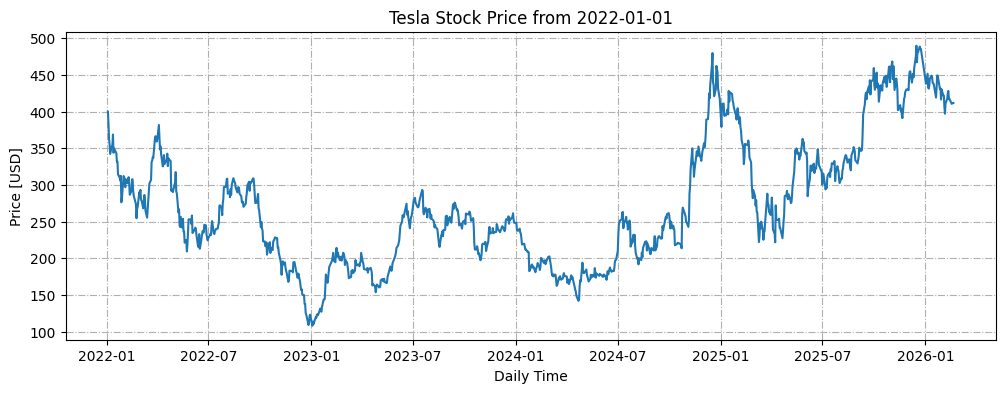

In [23]:
plt.figure(figsize=(12,4))
plt.plot(tsla_hist["Close"])
plt.grid(linestyle='-.')
plt.title(f"Tesla Stock Price from {start_date}")
plt.xlabel("Daily Time")
plt.ylabel("Price [USD]")
plt.show()

### Ejercicio rapido: APIs

Usando `yfinance`, descarga el historial de precios de **Apple (AAPL)** desde `start_date` hasta `end_date` (ya definidos) y muestra las primeras 5 filas con `.head()`.

In [ ]:
# Tu codigo aqui


<a id="ejercicios"></a>
## 5. Caso práctico: "Ingesta de Datos con Python"

Utilizando la biblioteca `yfinance` y lo aprendido en la sección de APIs, realice lo siguiente:

1. **Defina una lista de acciones bursátiles** llamada `stocks` que contenga diccionarios con las claves `"name"` y `"ticker"` para las siguientes empresas: **Tesla (TSLA)**, **Apple (AAPL)**, **Amazon (AMZN)** e **Intel Corporation (INTC)**.

2. **Cree una función `get_stock_data(stock, start_date, end_date)`** que reciba un diccionario de la lista anterior, una fecha de inicio y una fecha de fin, y retorne el historial de precios de la acción usando `yf.Ticker()` y `.history()`.

3. **Cree una función `plot_stock_feature(data, stock, feature, ax, show)`** que reciba un DataFrame con los datos de una acción, el diccionario del stock, el nombre de la columna a graficar (por ejemplo `"Close"`), un objeto `ax` de matplotlib y un booleano `show`. La función debe graficar la columna indicada, agregar una cuadrícula con estilo `'-.'`, un título con el nombre y ticker del stock, y etiquetas en los ejes X (`"Daily Time"`) e Y (`"Price [USD]"`).

4. **Itere sobre la lista de acciones** y para cada una: obtenga los datos con `get_stock_data`, grafíquelos con `plot_stock_feature` en un subplot (4 filas, 1 columna con ejes X compartidos), y almacene los datos en un diccionario llamado `datasets` usando el ticker como clave. Finalmente, agregue un título general al gráfico: *"Close Price for Tesla, Apple, Amazon and Intel"*.

**Nota:** Utilice las variables `start_date` y `end_date` definidas anteriormente en el notebook.


<a id='referencias'></a>
## Referencias

[1] Matthes, E. (2019). *Python crash course: A hands-on, project-based introduction to programming.* no starch press.

[2] Downey, A. (2015). *Think python: How to Think Like a Computer Scientist.* "O'Reilly Media, Inc.". 

[3] Johansson, R. *Numerical Python: Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib*. Apress, Berkeley, 2019.

<a id='contribuir'></a>
## Contribuir

<p>Para correcciones, <i>bugs</i> o sugerencias, por favor escribe a <a href="mailto:joefavergel@gmail.com">joefavergel@gmail.com</a> o directamente en el repositorio.</p>